In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential,load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
df_phone_accel = pd.read_csv("wisdm-dataset/raw/phone/accel/data_1600_accel_phone.txt", header=None)
for i in range(1601,1651):
    path = f"wisdm-dataset/raw/phone/accel/data_{i}_accel_phone.txt"
    df_phone_accel = pd.concat((df_phone_accel, pd.read_csv(path, header=None)))
df_phone_accel[5] = df_phone_accel[5].map(lambda x: x.rstrip(";")).astype("float")

In [3]:
col_names = ["participant", "activity", "timestamp", "x", "y", "z"]
df_phone_accel.columns = col_names
df_phone_accel = df_phone_accel.add_prefix("p_ac_")
df_phone_accel

,p_ac_participant,p_ac_activity,p_ac_timestamp,p_ac_x,p_ac_y,p_ac_z
0,1600,A,252207666810782,-0.364761,8.793503,1.055084
1,1600,A,252207717164786,-0.879730,9.768784,1.016998
2,1600,A,252207767518790,2.001495,11.109070,2.619156
3,1600,A,252207817872794,0.450623,12.651642,0.184555
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485
...,...,...,...,...,...,...
160774,1650,S,357734078421000,-8.234077,-4.275110,-1.439407
160775,1650,S,357734098619000,-8.080796,-4.418811,-1.415457
160776,1650,S,357734118715000,-7.994575,-4.457131,-1.441802
160777,1650,S,357734138868000,-8.040081,-4.366121,-1.496887


In [4]:
df_phone_accel.isna().sum()

p_ac_participant    0
p_ac_activity       0
p_ac_timestamp      0
p_ac_x              0
p_ac_y              0
p_ac_z              0
dtype: int64

In [5]:
df_phone_gyro = pd.read_csv("wisdm-dataset/raw/phone/gyro/data_1600_gyro_phone.txt", header=None)
for i in range(1601,1651):
    path = f"wisdm-dataset/raw/phone/gyro/data_{i}_gyro_phone.txt"
    df_phone_gyro = pd.concat((df_phone_gyro, pd.read_csv(path, header=None)))
df_phone_gyro[5] = df_phone_gyro[5].map(lambda x: x.rstrip(";")).astype("float")

In [6]:
df_phone_gyro.columns = col_names
df_phone_gyro = df_phone_gyro.add_prefix("p_gy_")
df_phone_gyro

,p_gy_participant,p_gy_activity,p_gy_timestamp,p_gy_x,p_gy_y,p_gy_z
0,1600,A,252207918580802,-0.853210,0.297226,0.890182
1,1600,A,252207968934806,-0.875137,0.015472,0.162231
2,1600,A,252208019288809,-0.720169,0.388489,-0.284012
3,1600,A,252208069642813,-0.571640,1.227402,-0.241669
4,1600,A,252208119996817,-0.380493,1.202835,-0.213135
...,...,...,...,...,...,...
80343,1650,S,357733977635000,0.438889,0.171508,0.169377
80344,1650,S,357734017925000,0.444215,0.158724,0.197074
80345,1650,S,357734058325000,0.519849,0.037284,0.196009
80346,1650,S,357734098619000,0.545415,-0.086286,0.178964


In [7]:
df_phone_gyro.isna().sum()

p_gy_participant    0
p_gy_activity       0
p_gy_timestamp      0
p_gy_x              0
p_gy_y              0
p_gy_z              0
dtype: int64

In [8]:
df_watch_accel = pd.read_csv("wisdm-dataset/raw/watch/accel/data_1600_accel_watch.txt", header=None)
for i in range(1601,1651):
    path = f"wisdm-dataset/raw/watch/accel/data_{i}_accel_watch.txt"
    df_watch_accel = pd.concat((df_watch_accel, pd.read_csv(path, header=None)))
df_watch_accel[5] = df_watch_accel[5].map(lambda x: x.rstrip(";")).astype("float")

In [9]:
df_watch_accel.columns = col_names
df_watch_accel = df_watch_accel.add_prefix("w_ac_")
df_watch_accel

,w_ac_participant,w_ac_activity,w_ac_timestamp,w_ac_x,w_ac_y,w_ac_z
0,1600,A,90426708196641,7.091625,-0.591667,8.195502
1,1600,A,90426757696641,4.972757,-0.158317,6.696732
2,1600,A,90426807196641,3.253720,-0.191835,6.107758
3,1600,A,90426856696641,2.801216,-0.155922,5.997625
4,1600,A,90426906196641,3.770868,-1.051354,7.731027
...,...,...,...,...,...,...
66587,1650,S,2426184421424592,1.486500,-13.302334,5.355231
66588,1650,S,2426184471411932,4.017171,-13.146711,5.118205
66589,1650,S,2426184521399272,4.412214,-15.318253,3.370437
66590,1650,S,2426184571385262,4.426579,-13.012636,2.575563


In [10]:
df_watch_accel.isna().sum()

w_ac_participant    0
w_ac_activity       0
w_ac_timestamp      0
w_ac_x              0
w_ac_y              0
w_ac_z              0
dtype: int64

In [11]:
df_watch_gyro = pd.read_csv("wisdm-dataset/raw/watch/gyro/data_1600_gyro_watch.txt", header=None)
for i in range(1601,1651):
    path = f"wisdm-dataset/raw/watch/gyro/data_{i}_gyro_watch.txt"
    df_watch_gyro = pd.concat((df_watch_gyro, pd.read_csv(path, header=None)))
df_watch_gyro[5] = df_watch_gyro[5].map(lambda x: x.rstrip(";")).astype("float")

In [12]:
df_watch_gyro.columns = col_names
df_watch_gyro = df_watch_gyro.add_prefix("w_gy_")
df_watch_gyro

,w_gy_participant,w_gy_activity,w_gy_timestamp,w_gy_x,w_gy_y,w_gy_z
0,1600,A,90426757696641,0.314944,-1.022277,-0.309962
1,1600,A,90426807196641,0.387382,-0.618541,-0.048972
2,1600,A,90426856696641,0.070999,-0.209480,-0.195978
3,1600,A,90426906196641,0.037975,0.254976,-0.156563
4,1600,A,90426955696641,0.073129,0.719431,-0.001035
...,...,...,...,...,...,...
66551,1650,S,2426184371437252,-2.856065,2.057101,0.853933
66552,1650,S,2426184421424592,-2.911458,1.817417,1.281104
66553,1650,S,2426184471411932,-3.015854,1.550036,2.057682
66554,1650,S,2426184521399272,-3.218254,1.595842,3.018550


In [13]:
df_watch_gyro.isna().sum()

w_gy_participant    0
w_gy_activity       0
w_gy_timestamp      0
w_gy_x              0
w_gy_y              0
w_gy_z              0
dtype: int64

We notice no nulls in any of the datasets. that's a good thing.

In [14]:
df_activity = pd.read_csv("wisdm-dataset/activity_key.txt", sep="=", header=None)
activities = df_activity[0].values
df_activity[1] = df_activity[1].apply(lambda x: x.strip())
df_activity

,0,1
0,walking,A
1,jogging,B
2,stairs,C
3,sitting,D
4,standing,E
5,typing,F
6,teeth,G
7,soup,H
8,chips,I
9,pasta,J


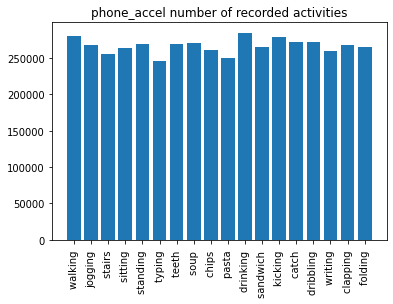

In [15]:
plt.bar(activities,df_phone_accel.iloc[:,1].value_counts().sort_index())
plt.title("phone_accel number of recorded activities")
plt.xticks(rotation=90)
plt.show()

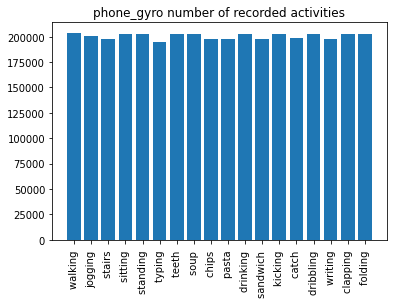

In [16]:
plt.bar(activities,df_phone_gyro.iloc[:,1].value_counts().sort_index())
plt.title("phone_gyro number of recorded activities")
plt.xticks(rotation=90)
plt.show()

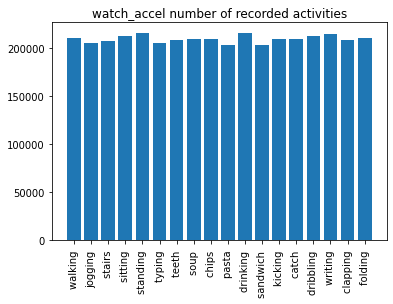

In [17]:
plt.bar(activities,df_watch_accel.iloc[:,1].value_counts().sort_index())
plt.title("watch_accel number of recorded activities")
plt.xticks(rotation=90)
plt.show()

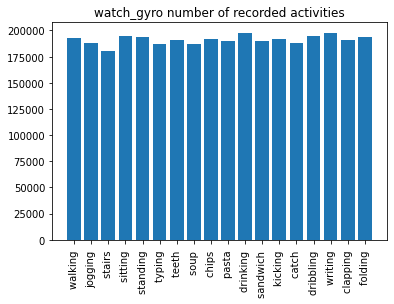

In [18]:
plt.bar(activities,df_watch_gyro.iloc[:,1].value_counts().sort_index())
plt.title("watch_gyro number of recorded activities")
plt.xticks(rotation=90)
plt.show()

We notice that each activity doesn't have the same number of recordings per sensor and we notice that each sensor gave different number of recordings for each activity.

We're going to make a combined dataset for all the sensors. We noticed that the timestamps don't match, thus we'll handle this by combining sequential data as if they're at the same time. We'll also discard extra readings per activity and just keep the minimum number of readings across the sensors.

In [19]:
# no need to run the following code as it's
# already executed and the dataset will be read in the following cell

# df_joint = None

# for i in range(1600,1651):
#     for j in df_activity[1].values:
#         min_len = min(len(df_phone_accel[(df_phone_accel.iloc[:,0]==i)&
#                                          (df_phone_accel.iloc[:,1]==j)]),
#                      len(df_phone_gyro[(df_phone_gyro.iloc[:,0]==i)&
#                                          (df_phone_gyro.iloc[:,1]==j)]),
#                      len(df_watch_accel[(df_watch_accel.iloc[:,0]==i)&
#                                          (df_watch_accel.iloc[:,1]==j)]),
#                      len(df_watch_gyro[(df_watch_gyro.iloc[:,0]==i)&
#                                          (df_watch_gyro.iloc[:,1]==j)]))
#         temp = pd.concat((df_phone_accel[(df_phone_accel.iloc[:,0]==i)&
#                                          (df_phone_accel.iloc[:,1]==j)].iloc[:min_len,:].reset_index(drop=True),
#                          df_phone_gyro[(df_phone_gyro.iloc[:,0]==i)&
#                                        (df_phone_gyro.iloc[:,1]==j)].iloc[:min_len,:].reset_index(drop=True),
#                          df_watch_accel[(df_watch_accel.iloc[:,0]==i)&
#                                         (df_watch_accel.iloc[:,1]==j)].iloc[:min_len,:].reset_index(drop=True),
#                          df_watch_gyro[(df_watch_gyro.iloc[:,0]==i)&
#                                        (df_watch_gyro.iloc[:,1]==j)].iloc[:min_len,:].reset_index(drop=True)),axis=1)
#         if df_joint is None:
#             df_joint = temp
#         else:
#             df_joint = pd.concat((df_joint, temp))

# df_joint.to_pickle("df_joint.pkl")

In [20]:
df_joint = pd.read_pickle("df_joint.pkl")
df_joint

,p_ac_participant,p_ac_activity,p_ac_timestamp,p_ac_x,p_ac_y,p_ac_z,p_gy_participant,p_gy_activity,p_gy_timestamp,p_gy_x,...,w_ac_timestamp,w_ac_x,w_ac_y,w_ac_z,w_gy_participant,w_gy_activity,w_gy_timestamp,w_gy_x,w_gy_y,w_gy_z
0,1600,A,252207666810782,-0.364761,8.793503,1.055084,1600,A,252207918580802,-0.853210,...,90426708196641,7.091625,-0.591667,8.195502,1600,A,90426757696641,0.314944,-1.022277,-0.309962
1,1600,A,252207717164786,-0.879730,9.768784,1.016998,1600,A,252207968934806,-0.875137,...,90426757696641,4.972757,-0.158317,6.696732,1600,A,90426807196641,0.387382,-0.618541,-0.048972
2,1600,A,252207767518790,2.001495,11.109070,2.619156,1600,A,252208019288809,-0.720169,...,90426807196641,3.253720,-0.191835,6.107758,1600,A,90426856696641,0.070999,-0.209480,-0.195978
3,1600,A,252207817872794,0.450623,12.651642,0.184555,1600,A,252208069642813,-0.571640,...,90426856696641,2.801216,-0.155922,5.997625,1600,A,90426906196641,0.037975,0.254976,-0.156563
4,1600,A,252207868226798,-2.164352,13.928436,-4.422485,1600,A,252208119996817,-0.380493,...,90426906196641,3.770868,-1.051354,7.731027,1600,A,90426955696641,0.073129,0.719431,-0.001035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3594,1650,S,357626608042000,-7.276070,-5.302574,-1.829795,1650,S,357699155079000,0.041545,...,2426184321449912,4.768950,-5.401469,7.584232,1650,S,2426184371437252,-2.856065,2.057101,0.853933
3595,1650,S,357626628138000,-7.144343,-5.460645,-2.019001,1650,S,357699195384000,0.214118,...,2426184371437252,2.137723,-7.211485,8.065467,1650,S,2426184421424592,-2.911458,1.817417,1.281104
3596,1650,S,357626648248000,-7.163504,-5.534890,-2.184258,1650,S,357699235690000,0.517719,...,2426184421424592,1.486500,-13.302334,5.355231,1650,S,2426184471411932,-3.015854,1.550036,2.057682
3597,1650,S,357626668344000,-7.314390,-5.625901,-2.098037,1650,S,357699275996000,0.394148,...,2426184471411932,4.017171,-13.146711,5.118205,1650,S,2426184521399272,-3.218254,1.595842,3.018550


### Now we will work on developing an LSTM model for classifying activities i.e. multiclass classification task.

In [21]:
feature_options = ["x", "y", "z"]
features = []

for feature in feature_options:
    features.append("p_ac_"+ feature)
    features.append("p_gy_" + feature)
    features.append("w_ac_" + feature)
    features.append("w_gy_" + feature)
features

['p_ac_x',
 'p_gy_x',
 'w_ac_x',
 'w_gy_x',
 'p_ac_y',
 'p_gy_y',
 'w_ac_y',
 'w_gy_y',
 'p_ac_z',
 'p_gy_z',
 'w_ac_z',
 'w_gy_z']

We'll extract the recordings per participant and activity in windows (sequence lengths) of 30 (see the comment in the following cell for more info on this).  


In [32]:
X_train = []
y_train = []
window = 30 # assuming we're getting 1 set of recordings every seconds (not actually the case), this makes our window size roughly 30 seconds

# we will keep participant 1650 for the validation set
for participant in range(1600, 1650):
    for activity in df_activity[1].values:
        curr_dataset = df_joint[(df_joint.p_ac_participant == participant) &
                                (df_joint.p_ac_activity == activity)][features]
        for index in range(len(curr_dataset)-200,len(curr_dataset)-window,window): # we're only going to use the last 200 datapoints inputs to speed up our model training
                                                                                   # note that we tried running the code with all the datapoints but performance is comperable
            X_train.append(curr_dataset.iloc[index:index+window,:].values)
            y_train.append(activity)

# we use pad_sequences as some inputs in X_train may contain data lengths less than 30 (200 % 30 != 0)
# also dtype float32 as this is wanted by tensorflow


X_train = pad_sequences(X_train, dtype=np.float32)
y_train = np.array(y_train)

We'll use one-hot-encoding to encode the activities to perform multiclass classification on them.  
We won't be dropping a column as our model isn't susceptible to the dummy variable trap.

In [33]:
y_encoder = OneHotEncoder(sparse=False)
y_encoder.fit(df_activity[1].values.reshape(-1,1))
y_train = y_encoder.transform(y_train.reshape(-1,1))
y_train = np.array(y_train, dtype=np.float32)

Now we'll extract our validation datasets from the last participant with ID: $1650$  
Note that we're requiring a minimum of `window` readings for the classification which in this case is $30$ meaning we won't start the classification unless we have at least 30 recordings.

In [34]:
X_val = []
y_val = []
for activity in df_activity[1]:
    curr_dataset = df_joint[(df_joint.p_ac_participant == 1650) &
                                (df_joint.p_ac_activity == activity)][features]
    for index in range(len(curr_dataset)-200,len(curr_dataset)-window,window): # we're only going to use the last 200 datapoints to speed up our model training
            X_val.append(curr_dataset.iloc[index:index+window,:].values)
            y_val.append(activity)
    
X_val = np.array(X_val, dtype=np.float32)
y_val = np.array(y_val)

In [35]:
y_val = y_encoder.transform(y_val.reshape(-1,1))
y_val = np.array(y_val, dtype=np.float32)

Now we will normalize our data. we will also shuffle our data to add randomness.

In [36]:
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train.reshape(X_train.shape[0]*X_train.shape[1],
                                                 X_train.shape[2])).reshape(X_train.shape)
X_val = X_scaler.transform(X_val.reshape(X_val.shape[0]*X_val.shape[1],X_val.shape[2])).reshape(X_val.shape)

X_train, y_train = shuffle(X_train, y_train)
X_val, y_val = shuffle(X_val, y_val)

In [38]:
classification_model_path = 'LSTM_model1.h5'

# build the network
nb_features = X_train.shape[2]
nb_out =  y_train.shape[-1]

classification_model = Sequential()

#add first LSTM layer
classification_model.add(LSTM(
         input_shape=(window, nb_features),
         units=200,
         return_sequences=True))
classification_model.add(Dropout(0.2)) 

# add second LSTM layer
classification_model.add(LSTM(
          units=100,
          return_sequences=True))
classification_model.add(Dropout(0.2))

# We'll add more LSTM layers
classification_model.add(LSTM(
          units=50,
          return_sequences=True))
classification_model.add(Dropout(0.2))

classification_model.add(LSTM(
          units=100,
          return_sequences=True))
classification_model.add(Dropout(0.2))

classification_model.add(LSTM(
          units=50,
          return_sequences=False))
classification_model.add(Dropout(0.2))

classification_model.add(Dense(units=nb_out))
classification_model.add(Activation("softmax"))
classification_optimizer = keras.optimizers.Adam(learning_rate = 0.01)
classification_model.compile(loss='categorical_crossentropy', optimizer=classification_optimizer, metrics=['accuracy'])

print(classification_model.summary())

# fit the network
classification_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.05, verbose=2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 30, 200)           170400    
                                                                 
 dropout_25 (Dropout)        (None, 30, 200)           0         
                                                                 
 lstm_26 (LSTM)              (None, 30, 100)           120400    
                                                                 
 dropout_26 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_27 (LSTM)              (None, 30, 50)            30200     
                                                                 
 dropout_27 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_28 (LSTM)              (None, 30, 100)          

Epoch 51/100
81/81 - 18s - loss: 2.8923 - accuracy: 0.0528 - val_loss: 2.8963 - val_accuracy: 0.0333 - 18s/epoch - 216ms/step
Epoch 52/100
81/81 - 22s - loss: 2.8925 - accuracy: 0.0460 - val_loss: 2.8960 - val_accuracy: 0.0519 - 22s/epoch - 273ms/step
Epoch 53/100
81/81 - 21s - loss: 2.8927 - accuracy: 0.0509 - val_loss: 2.8935 - val_accuracy: 0.0296 - 21s/epoch - 264ms/step
Epoch 54/100
81/81 - 31s - loss: 2.8925 - accuracy: 0.0483 - val_loss: 2.8929 - val_accuracy: 0.0444 - 31s/epoch - 382ms/step
Epoch 55/100
81/81 - 29s - loss: 2.8919 - accuracy: 0.0542 - val_loss: 2.8948 - val_accuracy: 0.0296 - 29s/epoch - 364ms/step
Epoch 56/100
81/81 - 29s - loss: 2.8921 - accuracy: 0.0513 - val_loss: 2.8945 - val_accuracy: 0.0519 - 29s/epoch - 356ms/step
Epoch 57/100
81/81 - 29s - loss: 2.8922 - accuracy: 0.0526 - val_loss: 2.8967 - val_accuracy: 0.0296 - 29s/epoch - 356ms/step
Epoch 58/100
81/81 - 29s - loss: 2.8926 - accuracy: 0.0515 - val_loss: 2.8950 - val_accuracy: 0.0296 - 29s/epoch - 360

In [39]:
scores_test = classification_model.evaluate(X_val, y_val, verbose=2)
print(scores_test)
y_pred = classification_model.predict(X_val)

4/4 - 0s - loss: 2.8906 - accuracy: 0.0556 - 458ms/epoch - 115ms/step
[2.890624761581421, 0.0555555559694767]
4/4 [==============================] - 5s 91ms/step


In [40]:
counter = 0
for i in y_pred:
    print(np.argmax(i))
    if counter == 10:
        break
    counter += 1

9
9
9
9
9
9
9
9
9
9
9


We notice that the above model isn't learning how to classify based on features and is just sticking to one activity to classify everything as. We ran it many times and each time it picks an activity to classify everything as.  
Perhaps this is because those sensor readings aren't distinguishable enough to provide sufficient clues for the classification. Or perhaps our model architecture isn't designed well enough to capture those subtle differences. Or perhaps the issue is with the data as we noticed that the timestamps aren't being collected at a persistant rate and that the watch readings are happening at a completely different timestamp than the phone readings. The reason is probably a combination of all three factors.

### Now we will work on developing an LSTM for time series prediction

We will split `df_joint` into `time_series_train_dataset` and `time_series_val_dataset` by extracting each but the last participant' activity "A" which corresponds to sitting. The model will learn the features for that activity. We will see if the model can make predicitons for participant $1650$ for this activity.

In [93]:
time_series_train_dataset = None
time_series_val_dataset = None

for participant in range(1600, 1650):
    curr_dataset = df_joint[(df_joint.p_ac_participant == participant) &
                            (df_joint.p_ac_activity == "A")]
    if time_series_train_dataset is None:
        time_series_train_dataset = curr_dataset
    else:
        time_series_train_dataset = pd.concat((time_series_train_dataset, curr_dataset))

time_series_val_dataset = df_joint[(df_joint.p_ac_participant == 1650) &
                            (df_joint.p_ac_activity == "A")]

Now we will build our training data

In [96]:
seq_length = 30 # assuming we're getting 1 set of recordings every seconds (not actually the case), this makes our window size roughly 30 seconds
ph = 1 # predictive horizon is set to 1 (seconds, say)

time_series_X_train = []
time_series_y_train = []

for participant in range(1600, 1650):
    for activity in df_activity[1].values:
        curr_dataset = time_series_train_dataset[(time_series_train_dataset.p_ac_participant == participant) &
                                (time_series_train_dataset.p_ac_activity == activity)][features]
        for index in range(0,len(curr_dataset)-window-ph,window):
            time_series_X_train.append(curr_dataset.iloc[index:index+seq_length,:].values)
            time_series_y_train.append(curr_dataset.iloc[index+seq_length+ph].values)

time_series_X_train = np.array(time_series_X_train, dtype=np.float32)
time_series_y_train = np.array(time_series_y_train, dtype=np.float32)

We'll shuffle the data. We won't scale the data as for some reason, it gave worse results when we compared it with the unscaled data.

In [97]:
# time_series_scaler = MinMaxScaler()
# time_series_X_train = time_series_scaler.fit_transform(time_series_X_train.reshape(
#                       time_series_X_train.shape[0]*time_series_X_train.shape[1],
#                       time_series_X_train.shape[2])).reshape(time_series_X_train.shape)

time_series_X_train, time_series_y_train = shuffle(time_series_X_train, time_series_y_train)

Now we'll build the model

In [98]:
# define path to save model
model_path = 'time_series_LSTM_model1.h5'

# build the network
nb_features = len(features)
nb_out =  len(features)

time_series_model = Sequential()

#add first LSTM layer
time_series_model.add(LSTM(
         input_shape=(seq_length, nb_features),
         units=100, 
         return_sequences=True))
time_series_model.add(Dropout(0.2)) 

# add second LSTM layer
time_series_model.add(LSTM(
          units=50,
          return_sequences=True))
time_series_model.add(Dropout(0.2))

# add more LSTM layers
time_series_model.add(LSTM(
          units=25,
          return_sequences=False))
time_series_model.add(Dropout(0.2))

time_series_model.add(Dense(units=nb_out))
time_series_model.add(Activation("linear")) 
optimizer = keras.optimizers.Adam(learning_rate = 0.01)
time_series_model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])

print(time_series_model.summary())

# fit the network
history = time_series_model.fit(time_series_X_train, time_series_y_train, epochs=100, batch_size=500, validation_split=0.05, verbose=2,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),
                       keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)]
          )

# list all data in history
print(history.history.keys())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 30, 100)           45200     
                                                                 
 dropout_39 (Dropout)        (None, 30, 100)           0         
                                                                 
 lstm_40 (LSTM)              (None, 30, 50)            30200     
                                                                 
 dropout_40 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_41 (LSTM)              (None, 25)                7600      
                                                                 
 dropout_41 (Dropout)        (None, 25)                0         
                                                                 
 dense_9 (Dense)             (None, 12)               

Epoch 60/100
12/12 - 10s - loss: 4.7206 - mse: 4.7206 - val_loss: 4.7608 - val_mse: 4.7608 - 10s/epoch - 855ms/step
Epoch 61/100
12/12 - 12s - loss: 4.6614 - mse: 4.6614 - val_loss: 4.7919 - val_mse: 4.7919 - 12s/epoch - 1s/step
Epoch 62/100
12/12 - 14s - loss: 4.6399 - mse: 4.6399 - val_loss: 4.7492 - val_mse: 4.7492 - 14s/epoch - 1s/step
Epoch 63/100
12/12 - 10s - loss: 4.5805 - mse: 4.5805 - val_loss: 4.7313 - val_mse: 4.7313 - 10s/epoch - 852ms/step
Epoch 64/100
12/12 - 10s - loss: 4.5308 - mse: 4.5308 - val_loss: 4.7388 - val_mse: 4.7388 - 10s/epoch - 848ms/step
Epoch 65/100
12/12 - 10s - loss: 4.5125 - mse: 4.5125 - val_loss: 4.7650 - val_mse: 4.7650 - 10s/epoch - 836ms/step
Epoch 66/100
12/12 - 10s - loss: 4.4761 - mse: 4.4761 - val_loss: 4.7270 - val_mse: 4.7270 - 10s/epoch - 848ms/step
Epoch 67/100
12/12 - 10s - loss: 4.4499 - mse: 4.4499 - val_loss: 4.7212 - val_mse: 4.7212 - 10s/epoch - 842ms/step
Epoch 68/100
12/12 - 10s - loss: 4.4411 - mse: 4.4411 - val_loss: 4.7946 - val

Now we'll build our validation dataset

In [99]:

time_series_X_val = []
time_series_y_val = []


curr_dataset = time_series_val_dataset[(time_series_val_dataset.p_ac_participant == 1650) &
                                       (time_series_val_dataset.p_ac_activity == "A")][features]
# we will create our validation sets with a minimum of 10 readings
for index in range(10,len(curr_dataset)-ph):
    if index < seq_length:
        time_series_X_val.append(curr_dataset.iloc[:index,:].values)
        time_series_y_val.append(curr_dataset.iloc[index+ph,:].values)
    else:
        time_series_X_val.append(curr_dataset.iloc[index-seq_length:index,:].values)
        time_series_y_val.append(curr_dataset.iloc[index+ph].values)

time_series_X_val = pad_sequences(time_series_X_val, maxlen=seq_length, dtype=np.float32)
time_series_y_val = np.array(time_series_y_val, dtype=np.float32)

In [100]:
scores_test = time_series_model.evaluate(time_series_X_val, time_series_y_val, verbose=2)
print('\nMSE: {}'.format(scores_test[1]))
y_pred_test = time_series_model.predict(time_series_X_val)
y_true_test = time_series_y_val


140/140 - 4s - loss: 12.8516 - mse: 12.8516 - 4s/epoch - 28ms/step

MSE: 12.851624488830566
140/140 [==============================] - 6s 36ms/step


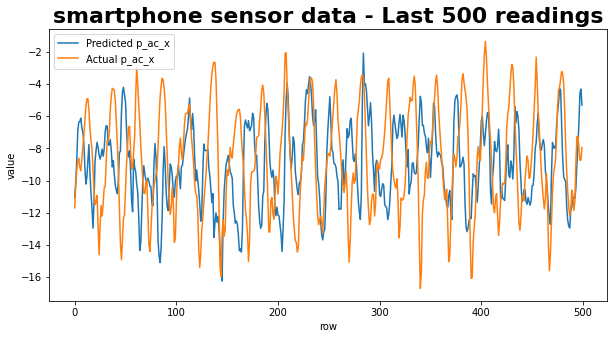

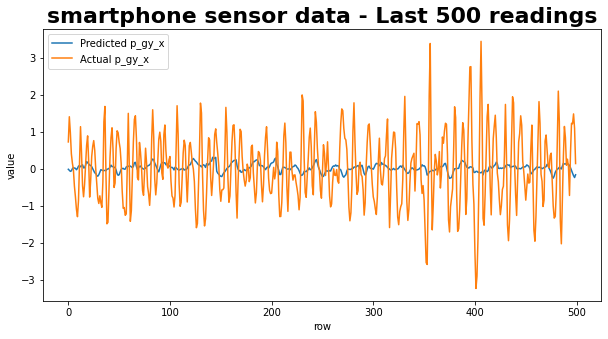

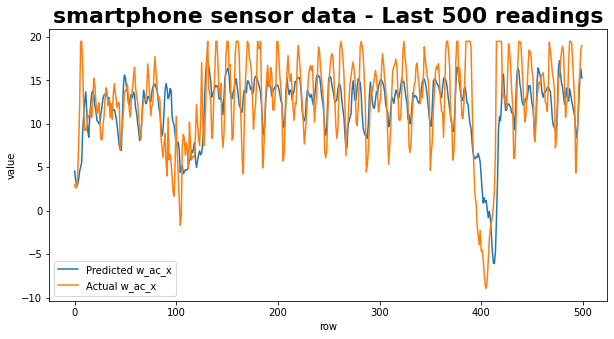

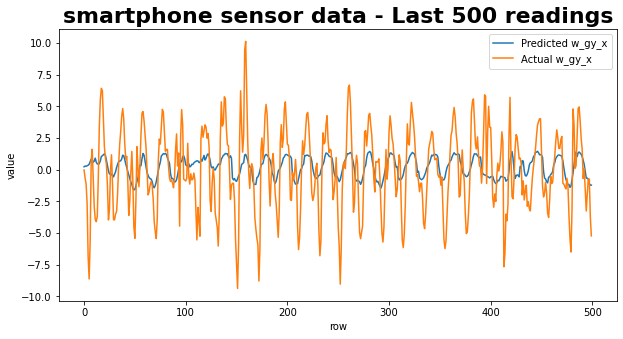

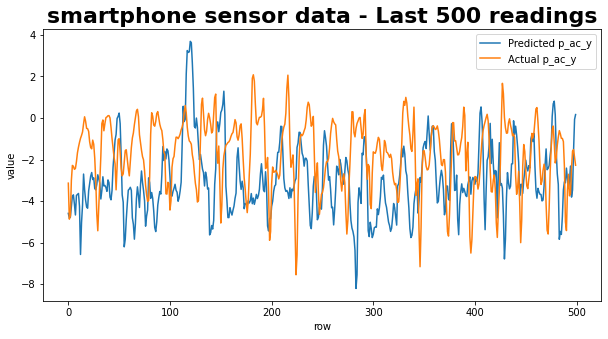

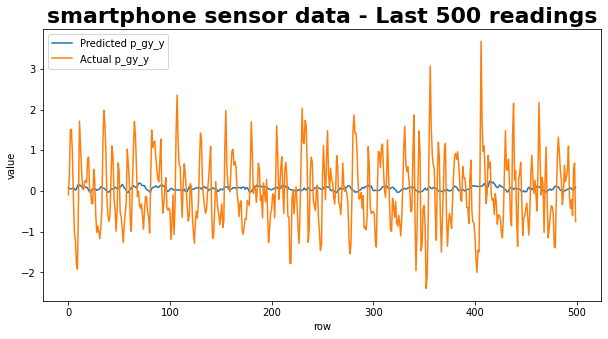

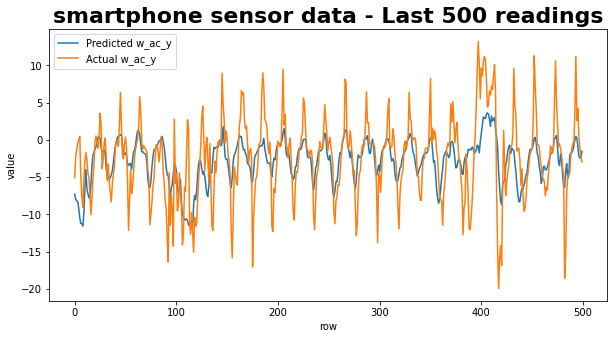

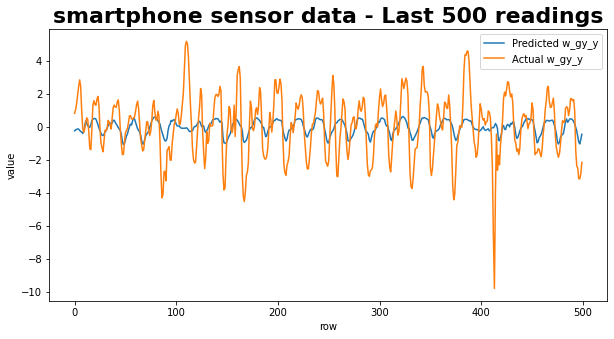

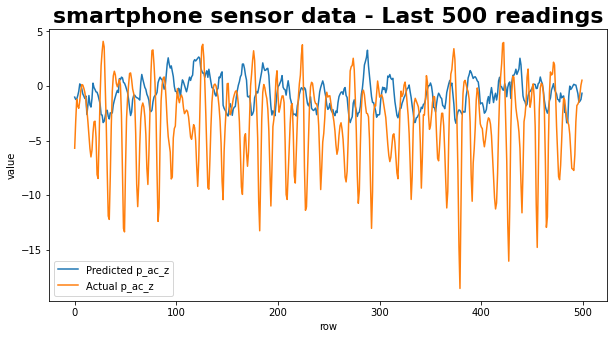

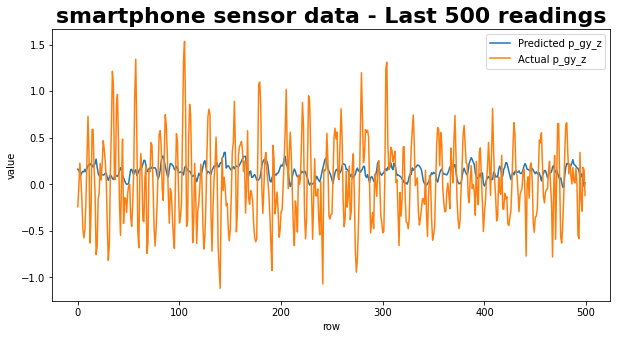

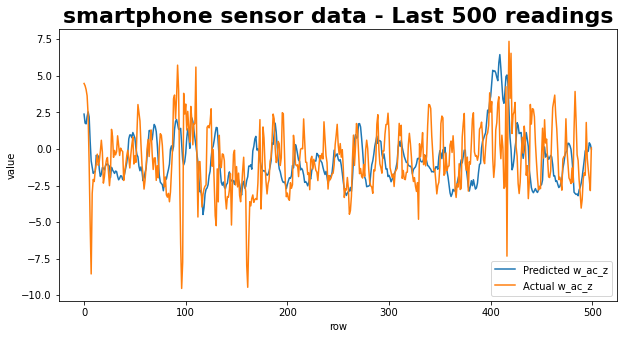

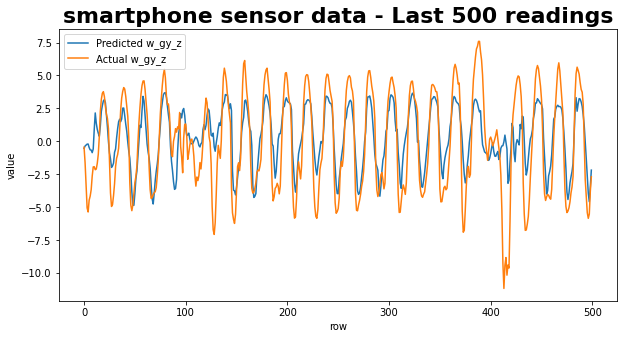

In [101]:
# Plot the predicted data vs. the actual data
for i in range(len(features)):
    fig_verify = plt.figure(figsize=(10, 5))
    plt.plot(y_pred_test[-500:][:,i], label = f'Predicted {features[i]}')
    plt.plot(y_true_test[-500:][:,i], label = f'Actual {features[i]}')
    plt.title('smartphone sensor data - Last 500 readings', fontsize=22, fontweight='bold')
    plt.ylabel('value')
    plt.xlabel('row')
    plt.legend()
    plt.show()

We will export the dataset with the prediction for the purpose of visualizing it on Tableau.  
We could have the above code run as script and automatically export a csv file for visualizing on a dashboard.

In [148]:
df_to_export = df_joint[(df_joint.p_ac_participant == 1650) & (df_joint.p_ac_activity == "A")]

In [138]:
df_pred = np.vstack((np.zeros((len(df_to_export)-len(y_pred_test),y_pred_test.shape[-1])),y_pred_test))
features_predicted = []
for i in range(len(features)):
    features_predicted.append(features[i]+"_predicted")
    
df_to_export[features_predicted] = df_pred

C:\Users\yousi\AppData\Local\Temp\ipykernel_54492\315024400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_export[features_predicted] = df_pred
C:\Users\yousi\AppData\Local\Temp\ipykernel_54492\315024400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_export[features_predicted] = df_pred
C:\Users\yousi\AppData\Local\Temp\ipykernel_54492\315024400.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [147]:
df_to_export.to_csv("df_for_visualization.csv")